In [67]:
import datetime
import numpy as np
import pandas as pd
from os import listdir
from datetime import date
import matplotlib.pyplot as plt
from os.path import isfile, join

In [68]:
# read in GSI Test Data
test_file = 'Run_2/2 E36313A 192.168.10.10.CSV'
data = pd.read_csv("GSI_Testing/" + test_file) 
data = data.iloc[8:]
data.rename(columns={"Address": "Time (s)", "TCPIP0::192.168.10.10::5025::SOCKET": "I2 (DC Current)", "Unnamed: 2": "V2 (DC Volt)"}, inplace = True)
data.head(10)

,Time (s),I2 (DC Current),V2 (DC Volt)
8,2019-11-24 12:07:19.042,0.428532,12.202442
9,2019-11-24 12:07:19.544,0.4284,12.202442
10,2019-11-24 12:07:20.040,0.428532,12.202442
11,2019-11-24 12:07:20.540,0.428664,12.202442
12,2019-11-24 12:07:21.041,0.428664,12.202442
13,2019-11-24 12:07:21.540,0.428796,12.202442
14,2019-11-24 12:07:22.039,0.428928,12.202442
15,2019-11-24 12:07:22.541,0.428928,12.202442
16,2019-11-24 12:07:23.040,0.42906,12.202442
17,2019-11-24 12:07:23.540,0.42906,12.202442


In [69]:
# convert date-time to total duration in seconds
temp = data['Time (s)'].tolist()
date_times = []

for i in range(len(temp)):
    date_time_str = temp[i]
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
    date_times.append(date_time_obj)

test_seconds = []
for i in range(len(date_times)):
    start = date_times[0]
    end = date_times[i]
    total_t = (end - start).total_seconds()
    test_seconds.append(total_t)
    
t_max = str(round(max(test_seconds), 2))
    
# current
current = data['I2 (DC Current)'].tolist()
voltage = data['V2 (DC Volt)'].tolist()

num_data_pts = str(len(voltage))

print('Test duration: ' + t_max)
print('Number of datapoints: ' + num_data_pts)



for i in range(len(current)):
    current[i] = float(current[i])
    voltage[i] = float(voltage[i])

current = current[:400]
voltage = voltage[:400]
test_seconds = test_seconds[:400]

Test duration: 231.5
Number of datapoints: 464


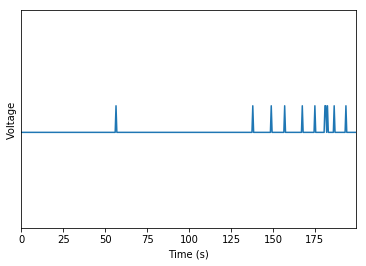

In [70]:
plt.plot(test_seconds, voltage)
plt.axis([0, max(test_seconds), min(voltage)-.003, max(voltage)+.003])
plt.xlabel("Time (s)")
plt.ylabel("Voltage")
plt.yscale('log')
plt.show()

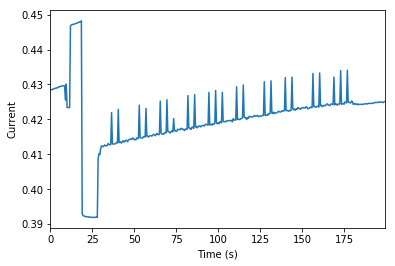

In [71]:
plt.plot(test_seconds, current)
plt.axis([0, max(test_seconds), min(current)-.003, max(current)+.003])
plt.xlabel("Time (s)")
plt.ylabel("Current")
#plt.yscale('log')
plt.show()